In [1]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statistics as stats
import pylab 
from scipy.signal import find_peaks

In [2]:
pvt = pd.read_csv("PVT.csv")
pvt = pvt.rename(index = str, columns={"Joy":"Joy Lim", "Other Joy":"Joy Liu"})
survey_qs = pd.read_csv("Cognitive_Fatigue_Data.csv")
survey_qs.insert(1, "Gender", ['F', 'F', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'M','M',], True)
pulse = pd.read_csv("Pulse/ShreyaJainHeartbeat.csv", skiprows = 6, names = ['Time', 'mV'])
pvt = pvt[pvt>100000]
pvt_mean = pvt.mean()
median_pvt = stats.median(pvt_mean)
fatigued = pvt_mean[pvt_mean>median_pvt]
not_fatigued = pvt_mean[pvt_mean<=median_pvt]
label = pvt_mean > median_pvt # false = not fatigued, true = fatigued

names = ['AnnaHe','ElaineChu','MarielaNazarioCastro','HarrisBubalo','OdessaThompson','ShreyaJain','VarunNair','JoyLiu','VishalKumar','ShuenWu','GovindChada','SuatMartin','DavidDelValle','YerielMaldonado','JoyLim','EdwardYan','CarolZhang','VineetChinthakindi','PratikBharadwaj','SharvilTrifale','AlexYu','EstebanCintron','AadiDass-Vattam']

Text(0.5, 1.0, 'Histogram of Medlytics Class Reactions')

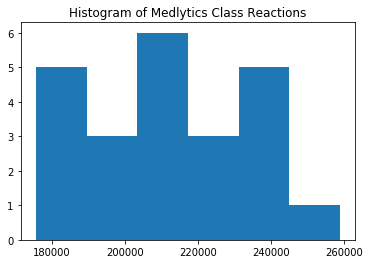

In [3]:
plt.hist(pvt_mean, bins=6) # bins = number of bars in the histogram
plt.title("Histogram of Medlytics Class Reactions")

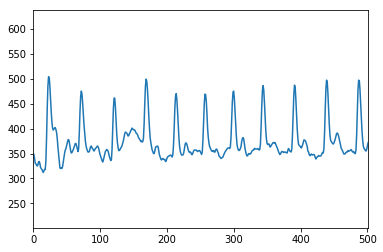

In [4]:
plt.plot(pulse['mV'])
pylab.xlim(0,501) # this is the first 10 seconds
plt.show()

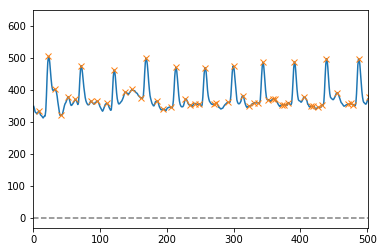

In [5]:
from scipy.misc import electrocardiogram
# x = electrocardiogram()[0:501]

peaks, _ = find_peaks(pulse['mV'])
plt.plot(pulse['mV'])
plt.plot(peaks, pulse['mV'][peaks], "x")
plt.plot(np.zeros_like(pulse['mV']), "--", color="gray")
pylab.xlim(0,501)
plt.show()

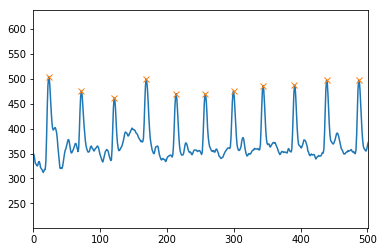

In [6]:
fs = 50
peaks, _ = find_peaks(pulse['mV'], distance=fs*40/60)
np.diff(peaks)
plt.plot(pulse['mV'])
plt.plot(peaks, pulse['mV'][peaks], "x")
pylab.xlim(0,501)
plt.show()

In [7]:
peaks[peaks<501].shape[0]*6

66

In [8]:
# gets number of beats per min by multiplying the number of heartbeats in first 10 seconds by 6
def get_heartrate(name):
        pulse = pd.read_csv("Pulse/"+name+"Heartbeat.csv", skiprows = 6, names = ['Time', 'mV'])
        peaks, _ = find_peaks(pulse['mV'], distance=fs*40/60)
        # np.diff(peaks)
        result = peaks[peaks<501].shape[0]*6
        return result

In [9]:
heart_rates = pd.DataFrame(index=np.arange(1),columns = names)
for i in range(len(names)):
    heart_rates.iloc[0,i]=get_heartrate(names[i])

In [10]:
heart_rates

,AnnaHe,ElaineChu,MarielaNazarioCastro,HarrisBubalo,OdessaThompson,ShreyaJain,VarunNair,JoyLiu,VishalKumar,ShuenWu,...,YerielMaldonado,JoyLim,EdwardYan,CarolZhang,VineetChinthakindi,PratikBharadwaj,SharvilTrifale,AlexYu,EstebanCintron,AadiDass-Vattam
0,66,66,66,66,72,66,60,60,66,60,...,60,66,72,60,66,78,72,60,60,72


In [11]:
# gets number of beats per min by dividing the number of heartbeats in full 2 min by 2
def get_heartrate_avg(name):
        pulse = pd.read_csv("Pulse/"+name+"Heartbeat.csv", skiprows = 6, names = ['Time', 'mV'])
        peaks, _ = find_peaks(pulse['mV'], distance=fs*40/60)
        # np.diff(peaks)
        result = peaks.shape[0]/2
        return result

In [12]:
avg_heart_rates = pd.DataFrame(index=np.arange(1),columns = names)
for i in range(len(names)):
    avg_heart_rates.iloc[0,i]=get_heartrate_avg(names[i])

In [13]:
avg_heart_rates

,AnnaHe,ElaineChu,MarielaNazarioCastro,HarrisBubalo,OdessaThompson,ShreyaJain,VarunNair,JoyLiu,VishalKumar,ShuenWu,...,YerielMaldonado,JoyLim,EdwardYan,CarolZhang,VineetChinthakindi,PratikBharadwaj,SharvilTrifale,AlexYu,EstebanCintron,AadiDass-Vattam
0,74.5,69,64,73.5,72,67,62.5,65,65.5,68,...,59,67,68.5,70,61,74.5,71.5,57,64.5,72


In [14]:
# SPEECH ANALYSIS

In [15]:
# import libraries
import parselmouth as pm
import os
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# importing data
Shreya = pm.Sound("Speech/ShreyaJain.wav")

In [17]:
# getting intensity, pitch, formant
hInt = Shreya.to_intensity()
hPit = Shreya.to_pitch()
hForm = Shreya.to_formant_burg()

In [18]:
def get_inds_intensity_mean(hInt):
    intensities = []
    for val in hInt.t_grid():
        intensities.append(hInt.get_value(val))
    intensities = np.array(intensities)
    intensities.mean()

In [19]:
formants = [[],[],[]]
for val in hForm.t_grid():
    formants[0].append(hForm.get_value_at_time(1,val))
    formants[1].append(hForm.get_value_at_time(2,val))
    formants[2].append(hForm.get_value_at_time(3,val))
    

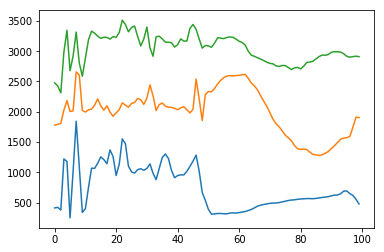

In [20]:
plt.plot(formants[0][0:100]) # 3 formants are 3 most significant components of voice
plt.plot(formants[1][0:100]) # this is like dimensionality reduction for sound
plt.plot(formants[2][0:100])

In [21]:

formant2_variation = max(formants[1])-min(formants[1])
formant3_variation = max(formants[2])-min(formants[2])

In [22]:
def get_formant1(name):
    person = pm.Sound("Speech/"+name+".wav")
    hForm = person.to_formant_burg()
    formants = [[],[],[]]
    for val in hForm.t_grid():
        formants[0].append(hForm.get_value_at_time(1,val))
        formants[1].append(hForm.get_value_at_time(2,val))
        formants[2].append(hForm.get_value_at_time(3,val))
    formant1_variation = max(formants[0])-min(formants[0])
    return formant1_variation

In [23]:
pitches = []
sum_pitches = 0
hPit.t_grid()
for val in hPit.t_grid():
    pitches.append(hPit.get_value_at_time(val))
#plt.plot(pitches[:100])
#hPit.get_value_at_time(hPit.t_grid[0])

In [24]:
all_form1_var = []
for name in names:
    all_form1_var.append(get_formant1(name))
survey_qs.insert(1,"form1variation",all_form1_var)
survey_qs

,Name,form1variation,Gender,sleep,fatigue scale,exercise(min),eating scale,stress scale,caffeine
0,Anna,2102.374767,F,7.00,7.0,0,8.0,3.0,0.00
1,Elaine,1855.051785,F,8.00,4.0,0,3.0,7.0,1.00
2,Mariela,2765.851231,F,4.00,4.0,0,5.0,1.0,0.00
3,Harris,2443.165865,M,6.00,6.0,15,6.0,3.0,0.00
4,Oddessa,3001.370527,F,5.50,6.0,30,7.0,7.0,2.00
5,Shreya,2409.291510,F,8.00,2.0,60,9.0,1.0,0.00
6,Varun,2486.950163,M,6.00,3.0,0,9.0,2.0,0.00
7,Joy Liu,1893.744547,F,6.50,5.0,10,10.0,8.0,0.50
8,Vishal,2378.246417,M,6.00,3.0,0,8.0,3.0,0.00
9,Shuen,2222.733258,M,4.00,8.0,0,4.0,7.0,1.00


In [25]:
pitches = np.array(pitches)
np.nanstd(pitches) # standard deviation, range

42.48340788323442

In [26]:
std_pitches = []
mean_intensities = []

In [27]:
def get_pitch_std(name):
    speech = pm.Sound("Speech/"+ name + ".wav")
    hPit = speech.to_pitch()
    pitches = []
    hPit.t_grid()
    for val in hPit.t_grid():
        pitches.append(hPit.get_value_at_time(val))
    pitches = np.array(pitches)
    return np.nanstd(pitches)

def get_inds_intensity_mean(name):
    speech = pm.Sound("Speech/"+ name + ".wav")
    hInt = speech.to_intensity()
    intensities = []
    for val in hInt.t_grid():
        intensities.append(hInt.get_value(val))
    intensities = np.array(intensities)
    return np.nanmean(intensities)

In [28]:
mean_intensities = []
for name in names:
    std_pitches.append(get_pitch_std(name))
    mean_intensities.append(get_inds_intensity_mean(name))
survey_qs.insert(1,"Pitch STD",std_pitches)
survey_qs.insert(1,"Avg Intensity",mean_intensities)
survey_qs

,Name,Avg Intensity,Pitch STD,form1variation,Gender,sleep,fatigue scale,exercise(min),eating scale,stress scale,caffeine
0,Anna,42.531021,33.274207,2102.374767,F,7.00,7.0,0,8.0,3.0,0.00
1,Elaine,46.815026,25.742984,1855.051785,F,8.00,4.0,0,3.0,7.0,1.00
2,Mariela,52.913345,43.118555,2765.851231,F,4.00,4.0,0,5.0,1.0,0.00
3,Harris,42.304821,98.464906,2443.165865,M,6.00,6.0,15,6.0,3.0,0.00
4,Oddessa,46.646374,46.735068,3001.370527,F,5.50,6.0,30,7.0,7.0,2.00
5,Shreya,45.776742,42.483408,2409.291510,F,8.00,2.0,60,9.0,1.0,0.00
6,Varun,64.674386,74.529496,2486.950163,M,6.00,3.0,0,9.0,2.0,0.00
7,Joy Liu,44.447999,47.528966,1893.744547,F,6.50,5.0,10,10.0,8.0,0.50
8,Vishal,54.988070,60.445064,2378.246417,M,6.00,3.0,0,8.0,3.0,0.00
9,Shuen,45.714167,29.154047,2222.733258,M,4.00,8.0,0,4.0,7.0,1.00


In [29]:
survey_qs

,Name,Avg Intensity,Pitch STD,form1variation,Gender,sleep,fatigue scale,exercise(min),eating scale,stress scale,caffeine
0,Anna,42.531021,33.274207,2102.374767,F,7.00,7.0,0,8.0,3.0,0.00
1,Elaine,46.815026,25.742984,1855.051785,F,8.00,4.0,0,3.0,7.0,1.00
2,Mariela,52.913345,43.118555,2765.851231,F,4.00,4.0,0,5.0,1.0,0.00
3,Harris,42.304821,98.464906,2443.165865,M,6.00,6.0,15,6.0,3.0,0.00
4,Oddessa,46.646374,46.735068,3001.370527,F,5.50,6.0,30,7.0,7.0,2.00
5,Shreya,45.776742,42.483408,2409.291510,F,8.00,2.0,60,9.0,1.0,0.00
6,Varun,64.674386,74.529496,2486.950163,M,6.00,3.0,0,9.0,2.0,0.00
7,Joy Liu,44.447999,47.528966,1893.744547,F,6.50,5.0,10,10.0,8.0,0.50
8,Vishal,54.988070,60.445064,2378.246417,M,6.00,3.0,0,8.0,3.0,0.00
9,Shuen,45.714167,29.154047,2222.733258,M,4.00,8.0,0,4.0,7.0,1.00


In [30]:
all_pulses =[]
for i in range(len(names)):
    all_pulses.append(get_heartrate_avg(names[i]))
all_pulses

[74.5,
 69.0,
 64.0,
 73.5,
 72.0,
 67.0,
 62.5,
 65.0,
 65.5,
 68.0,
 71.0,
 70.0,
 75.5,
 59.0,
 67.0,
 68.5,
 70.0,
 61.0,
 74.5,
 71.5,
 57.0,
 64.5,
 72.0]

In [31]:
survey_qs.insert(1,"Pulse",all_pulses)

In [32]:
survey_qs

,Name,Pulse,Avg Intensity,Pitch STD,form1variation,Gender,sleep,fatigue scale,exercise(min),eating scale,stress scale,caffeine
0,Anna,74.5,42.531021,33.274207,2102.374767,F,7.00,7.0,0,8.0,3.0,0.00
1,Elaine,69.0,46.815026,25.742984,1855.051785,F,8.00,4.0,0,3.0,7.0,1.00
2,Mariela,64.0,52.913345,43.118555,2765.851231,F,4.00,4.0,0,5.0,1.0,0.00
3,Harris,73.5,42.304821,98.464906,2443.165865,M,6.00,6.0,15,6.0,3.0,0.00
4,Oddessa,72.0,46.646374,46.735068,3001.370527,F,5.50,6.0,30,7.0,7.0,2.00
5,Shreya,67.0,45.776742,42.483408,2409.291510,F,8.00,2.0,60,9.0,1.0,0.00
6,Varun,62.5,64.674386,74.529496,2486.950163,M,6.00,3.0,0,9.0,2.0,0.00
7,Joy Liu,65.0,44.447999,47.528966,1893.744547,F,6.50,5.0,10,10.0,8.0,0.50
8,Vishal,65.5,54.988070,60.445064,2378.246417,M,6.00,3.0,0,8.0,3.0,0.00
9,Shuen,68.0,45.714167,29.154047,2222.733258,M,4.00,8.0,0,4.0,7.0,1.00


In [33]:
final_dat = survey_qs[['Name','Pulse','form1variation','Pitch STD','Gender','sleep','fatigue scale','exercise(min)','eating scale','stress scale','Avg Intensity']]

In [34]:
final_dat

,Name,Pulse,form1variation,Pitch STD,Gender,sleep,fatigue scale,exercise(min),eating scale,stress scale,Avg Intensity
0,Anna,74.5,2102.374767,33.274207,F,7.00,7.0,0,8.0,3.0,42.531021
1,Elaine,69.0,1855.051785,25.742984,F,8.00,4.0,0,3.0,7.0,46.815026
2,Mariela,64.0,2765.851231,43.118555,F,4.00,4.0,0,5.0,1.0,52.913345
3,Harris,73.5,2443.165865,98.464906,M,6.00,6.0,15,6.0,3.0,42.304821
4,Oddessa,72.0,3001.370527,46.735068,F,5.50,6.0,30,7.0,7.0,46.646374
5,Shreya,67.0,2409.291510,42.483408,F,8.00,2.0,60,9.0,1.0,45.776742
6,Varun,62.5,2486.950163,74.529496,M,6.00,3.0,0,9.0,2.0,64.674386
7,Joy Liu,65.0,1893.744547,47.528966,F,6.50,5.0,10,10.0,8.0,44.447999
8,Vishal,65.5,2378.246417,60.445064,M,6.00,3.0,0,8.0,3.0,54.988070
9,Shuen,68.0,2222.733258,29.154047,M,4.00,8.0,0,4.0,7.0,45.714167


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [36]:
is_fatigued = pd.Series(pvt_mean>median_pvt)

In [37]:
final_dat.insert(1,'Label',[True,True,False,False,False,False,False,True,True,False,False,True,True,True,True,False,False,False,True,True,True,False,False])

In [38]:
# normalizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

final_dat = final_dat.replace(to_replace = 'F',value=1)
final_dat = final_dat.replace(to_replace='M',value=0)
final_dat

,Name,Label,Pulse,form1variation,Pitch STD,Gender,sleep,fatigue scale,exercise(min),eating scale,stress scale,Avg Intensity
0,Anna,True,74.5,2102.374767,33.274207,1,7.00,7.0,0,8.0,3.0,42.531021
1,Elaine,True,69.0,1855.051785,25.742984,1,8.00,4.0,0,3.0,7.0,46.815026
2,Mariela,False,64.0,2765.851231,43.118555,1,4.00,4.0,0,5.0,1.0,52.913345
3,Harris,False,73.5,2443.165865,98.464906,0,6.00,6.0,15,6.0,3.0,42.304821
4,Oddessa,False,72.0,3001.370527,46.735068,1,5.50,6.0,30,7.0,7.0,46.646374
5,Shreya,False,67.0,2409.291510,42.483408,1,8.00,2.0,60,9.0,1.0,45.776742
6,Varun,False,62.5,2486.950163,74.529496,0,6.00,3.0,0,9.0,2.0,64.674386
7,Joy Liu,True,65.0,1893.744547,47.528966,1,6.50,5.0,10,10.0,8.0,44.447999
8,Vishal,True,65.5,2378.246417,60.445064,0,6.00,3.0,0,8.0,3.0,54.988070
9,Shuen,False,68.0,2222.733258,29.154047,0,4.00,8.0,0,4.0,7.0,45.714167


In [39]:
final_dat.corr()

,Label,Pulse,form1variation,Pitch STD,Gender,sleep,fatigue scale,exercise(min),eating scale,stress scale,Avg Intensity
Label,1.000000,0.021471,-0.285483,0.044281,0.031782,0.185822,0.363358,0.057764,0.005079,0.122388,-0.207308
Pulse,0.021471,1.000000,0.161673,-0.088888,0.092891,-0.182926,0.232554,-0.250292,0.383832,0.057517,-0.286300
form1variation,-0.285483,0.161673,1.000000,0.308140,-0.283649,-0.221912,0.169323,0.168730,0.227090,-0.310901,0.320875
Pitch STD,0.044281,-0.088888,0.308140,1.000000,-0.401551,0.092551,0.226792,0.484230,0.129569,-0.440159,0.241983
Gender,0.031782,0.092891,-0.283649,-0.401551,1.000000,0.188502,-0.237508,-0.263403,-0.044387,0.018337,-0.305745
sleep,0.185822,-0.182926,-0.221912,0.092551,0.188502,1.000000,-0.079677,0.274117,-0.095130,0.029879,-0.106793
fatigue scale,0.363358,0.232554,0.169323,0.226792,-0.237508,-0.079677,1.000000,0.235113,0.030822,0.292199,-0.395734
exercise(min),0.057764,-0.250292,0.168730,0.484230,-0.263403,0.274117,0.235113,1.000000,-0.034360,-0.038947,-0.045685
eating scale,0.005079,0.383832,0.227090,0.129569,-0.044387,-0.095130,0.030822,-0.034360,1.000000,-0.095720,-0.052098
stress scale,0.122388,0.057517,-0.310901,-0.440159,0.018337,0.029879,0.292199,-0.038947,-0.095720,1.000000,-0.304994


In [40]:
# Write your code here
data_train, data_test = train_test_split(final_dat, test_size = 0.30, random_state = 0, stratify = final_dat['Label'])

y_train = data_train['Label']
y_test = data_test['Label']

# only features 
features = ["fatigue scale","sleep","eating scale","exercise(min)"]
X_train = data_train[features] #,"fatigue scale"]]
X_test = data_test[features] # "fatigue scale"]]


X_train.head()

,fatigue scale,sleep,eating scale,exercise(min)
20,8.0,7.5,5.0,300
15,7.0,7.0,9.0,150
0,7.0,7.0,8.0,0
3,6.0,6.0,6.0,15
22,6.0,4.5,10.0,107


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

clf = RandomForestClassifier()
results = cross_val_score(clf,X_train, y_train,cv=5)
results = clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

20     True
15    False
0      True
3     False
22    False
Name: Label, dtype: bool [ True False  True  True False]
AUC:  0.984375
Training Acc:
0.9375


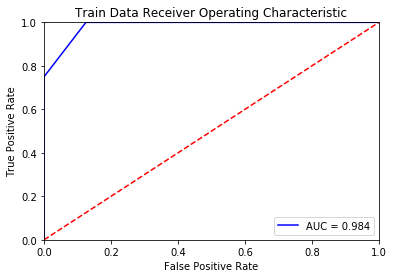

In [42]:
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# apply the model to train data
y_train_predict = clf.predict(X_train)
y_train_proba = clf.predict_proba(X_train)

print(y_train[:5],y_train_predict[:5]) 


#extract fpr and tpr to plot ROC curve and calculate AUC (Note: fpr-false positive rate and tpr -true positive rate)
fpr, tpr, threshold = metrics.roc_curve(y_train, y_train_proba[:,1])

# This is exctly the first metric you'll be evaluated on!
# Note: this will only work on the binary case -- you'll need a different method to do multi-class case
def cm_metric(y_true,y_prob):
    
    # predict the class with the greatest probability
    y_pred = [np.argmax(y) for y in y_prob]

    # calculate the confusion matrix
    cm = confusion_matrix(y_true, y_train_predict)

    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return sum(sum(np.multiply(cm_norm,np.array([[1, -2], [-2, 1]]))))

cm_metric(y_train,y_train_proba)

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
print('AUC: ',roc_auc)
print("Training Acc:")
print(metrics.accuracy_score(y_train,y_train_predict))

plt.title('Train Data Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC:  0.3333333333333333
Validation accuracy:
0.7142857142857143
['fatigue scale', 'sleep', 'eating scale', 'exercise(min)']


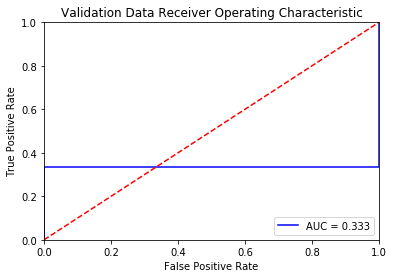

In [43]:
# apply the model to train data
y_test_predict = clf.predict(X_test)
y_test_proba = clf.predict_proba(X_test)

#extract fpr and tpr to plot ROC curve and calculate AUC (Note: fpr-false positive rate and tpr -true positive rate)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_proba[:,1])

# This is exctly the first metric you'll be evaluated on!
# Note: this will only work on the binary case -- you'll need a different method to do multi-class case
def cm_metric(y_true,y_prob):
    
    # predict the class with the greatest probability
    y_pred = [np.argmax(y) for y in y_prob]

    # calculate the confusion matrix
    cm = confusion_matrix(y_true, y_test_predict)

    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return sum(sum(np.multiply(cm_norm,np.array([[1, -2], [-2, 1]]))))

cm_metric(y_test,y_test_proba)

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
print('AUC: ',roc_auc)
print("Validation accuracy:")
print(metrics.accuracy_score(y_test,y_test_predict))

import matplotlib.pyplot as plt
print(features)
plt.title('Validation Data Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
names2 = ['Adam','Andy','Carol2','Chris','Emily','Esteban2','Jeanette','Saketh','Shuen2','Suat2','Yeriel2']

In [55]:
def get_heartrate_avg2(name):
        pulse = pd.read_csv("ValidationPulse/"+name+"Heartbeat.csv", skiprows = 6, names = ['Time', 'mV'])
        peaks, _ = find_peaks(pulse['mV'], distance=fs*40/60)
        # np.diff(peaks)
        result = peaks.shape[0]/2
        return result    

In [56]:
test_data_pulse = []
for name in names2:
    test_data_pulse.append(get_heartrate_avg2(name))
valtestdata = pd.DataFrame({'Pulse':test_data_pulse})

In [67]:
pvt_val = pd.read_csv('PVTval.csv')
pvt_val = np.array(pvt_val)
pvt_val = pvt_val[pvt_val>100000]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


208706.64818763325